In [2]:
import dataclasses
import typing
import random
import numpy as np

from matplotlib import pyplot as plt

START_TIME = 8 * 60
END_TIME = 20 * 60


@dataclasses.dataclass
class BusArrivalEntity:
    time: int
    passengers_count: int


BusesList = list[BusArrivalEntity]


def single_day(bus_time_func: typing.Callable) -> BusesList:
    """
    :param bus_time_func: a callable function invoked on determining new bus interval randomly
    """
    buses_entities: BusesList = list()

    minutes_passed = 0
    last_bus_went = 0
    next_bus_interval = 0
    while minutes_passed < (END_TIME - START_TIME):
        if last_bus_went == next_bus_interval:
            # <last_bus_went> passengers went away on the bus
            b_entity = BusArrivalEntity(
                time=minutes_passed,
                passengers_count=last_bus_went
            )
            buses_entities.append(b_entity)

            last_bus_went = 0
            next_bus_interval = bus_time_func()

        minutes_passed += 1
        last_bus_went += 1

    return buses_entities


def draw_hist(values: typing.Sequence, title=None, xlabel=None, ylabel='density'):
    bins = max(values) - min(values) + 1
    plt.hist(values, density=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


In [3]:

random.seed(10)

experiments_cnt = 10 ** 4
experiments_list: list[BusesList] = [single_day(
    bus_time_func=lambda: random.choice([5, 10])
) for _ in range(experiments_cnt)]


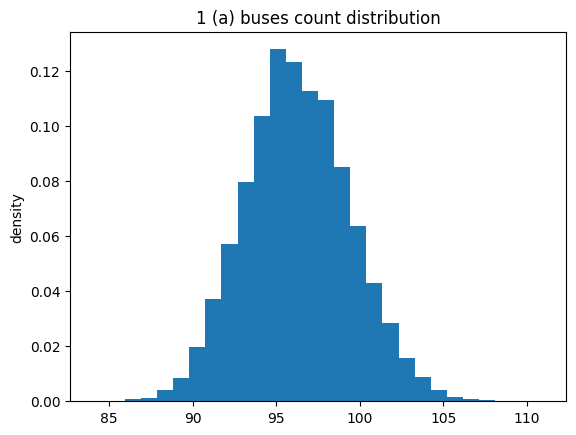


Похоже, что это нормальное распределение


In [4]:
# --- 1 (а) ---


def graph1(experiments: list):
    buses_cnt_values = [len(exp) for exp in experiments]
    draw_hist(buses_cnt_values, '1 (а) buses count distribution')

graph1(experiments_list)

print("\nПохоже, что это нормальное распределение")

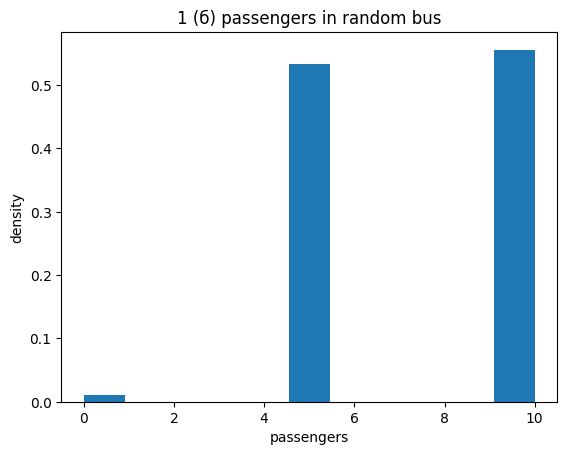

Mean:  7.477
Variance:  6.734471000000001

Значения 5 и 10 (практически) равновероятны, как и должно быть


In [5]:
# --- 1 (б) ---

random.seed(10)

def graph2(experiments: list):
    values_list: list[int] = list()

    for exp in experiments:
        bus_choice_i = random.randint(0, len(exp) - 1)
        bus_choice = exp[bus_choice_i]

        value = bus_choice.passengers_count
        values_list.append(value)

    draw_hist(values_list, '1 (б) passengers in random bus', 'passengers', 'density')

    print('Mean: ', np.mean(values_list))
    print('Variance: ', np.var(values_list))

graph2(experiments_list)

print("\nЗначения 5 и 10 (практически) равновероятны, как и должно быть")

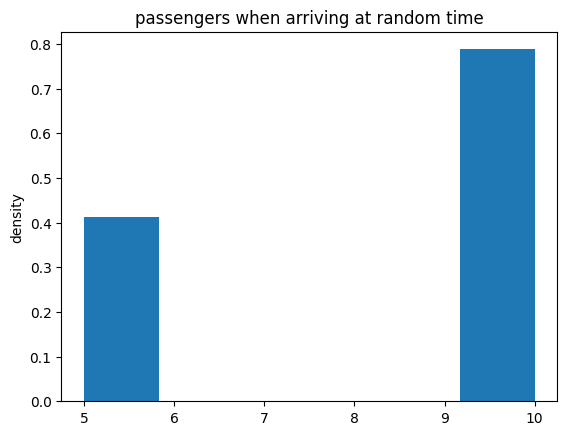

Mean:  8.284298857547265
Variance:  5.634875302050055

Comments:
Согласно парадоксу инспектора, более длинные промежутки (10мин) более вероятны


In [6]:
# --- 1 (в) ---

random.seed(10)

def graph3(experiments: list):
    def nearest_bigger(a: BusesList, time: int) -> int:
        i = 0
        while i < len(a) - 1 and a[i].time <= time:
            i += 1

        return i

    values_list: list[int] = list()

    for exp in experiments:
        timon_time_choice = random.randint(0, END_TIME - START_TIME)

        if timon_time_choice > exp[-1].time:
            # Тимон не попадет на автобус
            continue

        next_bus_ind: int = nearest_bigger(exp, timon_time_choice)
        next_bus = exp[next_bus_ind]

        value = next_bus.passengers_count
        values_list.append(value)

    draw_hist(values_list, 'passengers when arriving at random time')

    print('Mean: ', np.mean(values_list))
    print('Variance: ', np.var(values_list))


graph3(experiments_list)

print("\nComments:")
print("Согласно парадоксу инспектора, более длинные промежутки (10мин) более вероятны")

# Графики с экспоненциальным временем автобуса

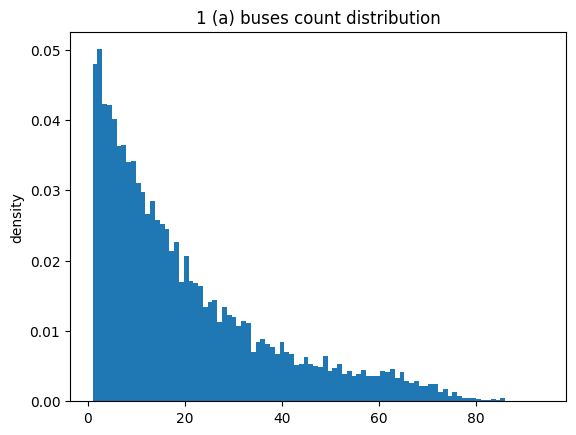

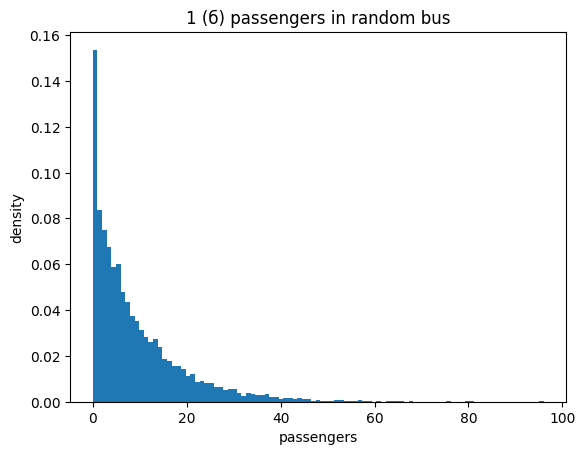

Mean:  8.869
Variance:  96.84303900000002


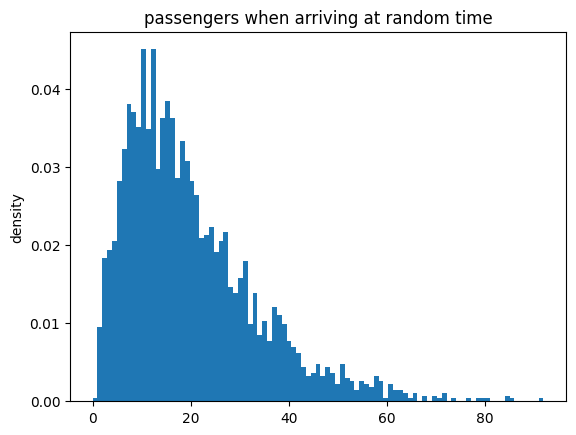

Mean:  19.781679942070962
Variance:  184.89114880704878


In [7]:
# --- 1 (г) ---

random.seed(10)


experiments_list_exp: list[BusesList] = [
    single_day(
        bus_time_func=lambda: round(random.expovariate(1 / 10))
    ) for _ in range(experiments_cnt)
]

graph1(experiments_list_exp)
graph2(experiments_list_exp)
graph3(experiments_list_exp)

1) На первом графике, количество автобусов похоже на экспоненциальное распределение

2) На втором графике, как и ожидалось количество пассажиров экспоненциально

3) На третьем графике, матожидание сместилось к 19, т.к. в парадоксе инспектора слишком маленькие промежуткиn маловероятны